In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'MNIST'

In [3]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))


Using TensorFlow backend.


Dataset size (70000, 28, 28)


# VAE

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from utils.constants import Models as models
from models.AE import AE


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [6]:
ae = AE(model_type=models.VAE, dataset_name=dataset_name,hidden_dim=500, plot=False, isConv=False)

Loading previous configuration ...
Saving Model Arguments ...
building VAE graph ... 
Instructions for updating:
Colocations handled automatically by placer.

[*] Defining encoders...

Instructions for updating:
Use keras.layers.dense instead.
[*] Layer ( encoder_mean/enmean_dense_1/Relu:0 ) output shape: [64, 500]
Instructions for updating:
Use keras.layers.dropout instead.
[*] Layer ( encoder_mean/enmean_dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_2_dropout/Identity:0 ) output shape: [64, 500]
Instructions for updating:
Use keras.layers.batch_normalization instead.
[*] Layer ( encoder_mean/enmean_H2_batch_norm/batchnorm/add_1:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/enmean_dense_3/BiasAdd:0 ) output shape: [64, 15]

[*] Layer ( encoder_var/envar_dense_1/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/envar_dense_1_dropout/Identity:0 ) output sha

In [7]:
#ae.fit(X,y)

In [8]:
from utils.plots import plot_samples, merge
from skimage.transform import resize
import matplotlib.pyplot as plt

Loading model checkpoint experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750
Model loaded
EPOCHS trained:  223
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750
Model loaded
EPOCHS trained:  223
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750
Model loaded
EPOCHS trained:  223
random sample batch ...
Loading model checkpoint experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750 ...

INFO:tensorflow:Restoring parameters from experiments/checkpoint_dir/VAE__MNIST_lat15_h500_lay3/-197750
Model loaded
EPOCHS trained:  223
random s

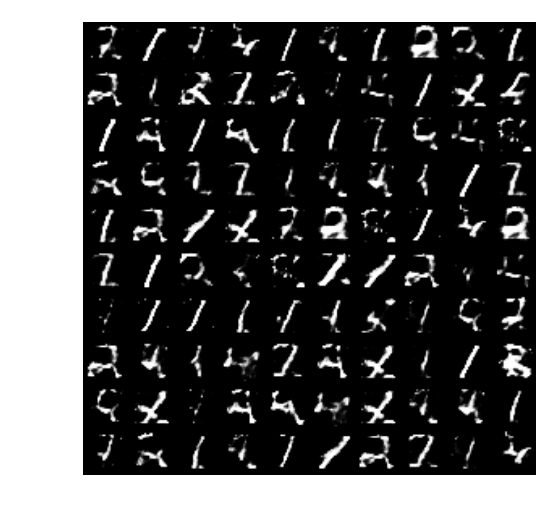

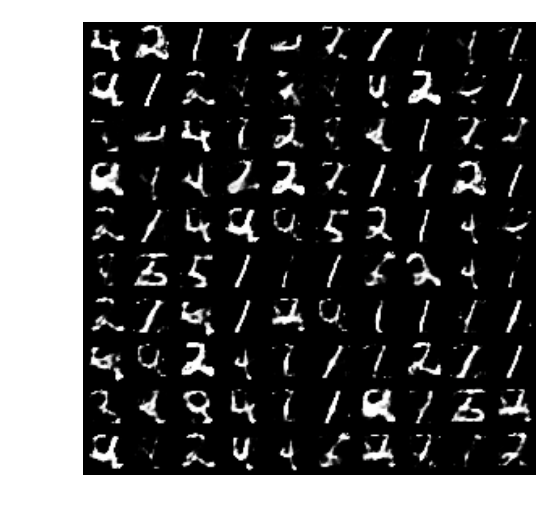

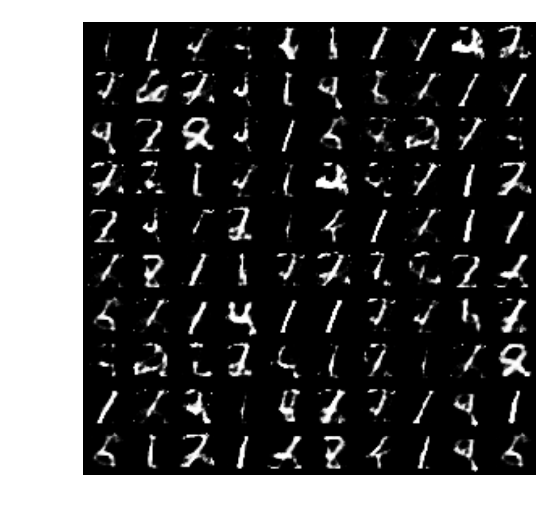

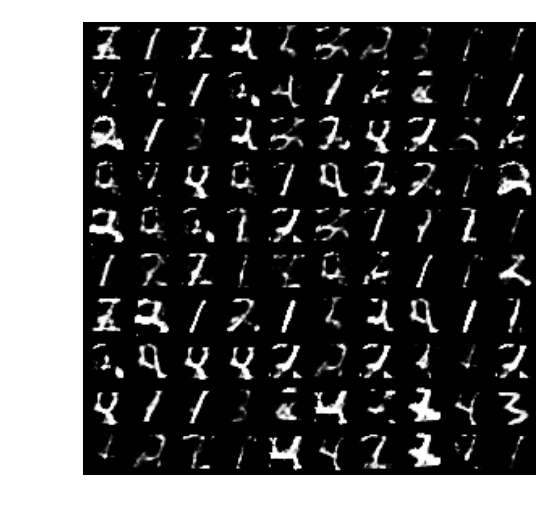

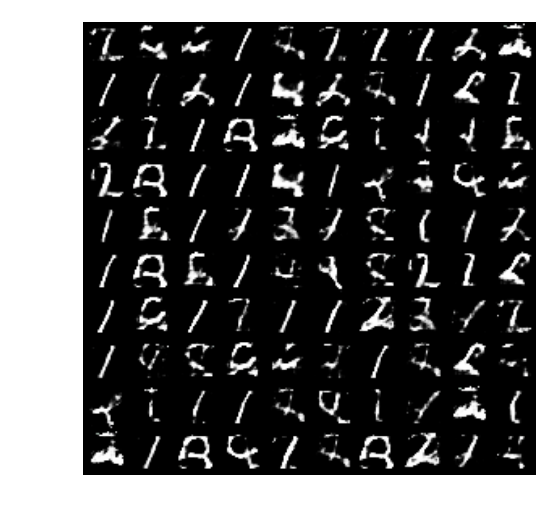

In [9]:
for _ in range(5):
    samples = ae.reconst_samples_out_data()
    scale = 10
    im = merge(samples, (10,10))
    fig_width = int(im.shape[0] * scale)
    fig_height = int(im.shape[1] * scale)
    im = resize(im, (fig_width, fig_height), anti_aliasing=True)
    plt.figure(dpi=150)
    plt.imshow(im)
    plt.axis('off')